In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.metrics import confusion_matrix,accuracy_score

/home/tecomp/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

No null values in this dataset

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

<Axes: xlabel='Purchased', ylabel='count'>

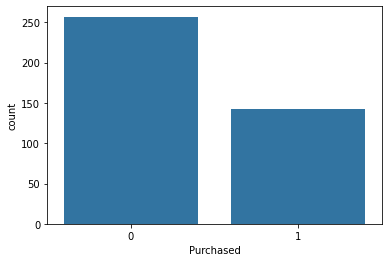

In [6]:
sns.countplot(x='Purchased', data=df)


<Axes: xlabel='Purchased', ylabel='count'>

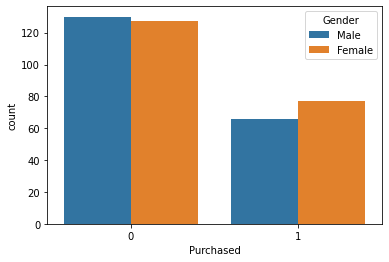

In [7]:
sns.countplot(x='Purchased', data=df, hue='Gender')


In [8]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [10]:
df.drop('User ID', axis=1, inplace=True)

In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


<Axes: >

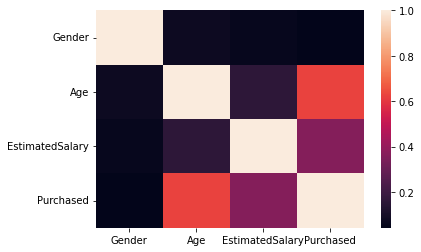

In [12]:
sns.heatmap(df.corr())

In [13]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,0.073741,0.060435,0.042469
Age,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.060435,0.155238,1.000000,0.362083
Purchased,0.042469,0.622454,0.362083,1.000000


<Axes: xlabel='Purchased', ylabel='Age'>

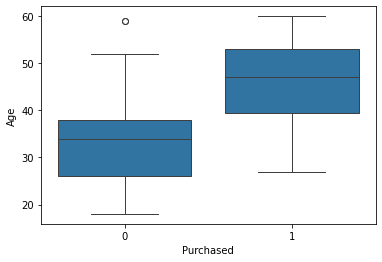

In [14]:
sns.boxplot(x='Purchased', y='Age', data=df)

In [15]:
from sklearn.linear_model import LogisticRegression

X = df[['Age']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

if X is Age only then -> [[50  2] -> Gives accuracy 0.9125
                          [5 23]]

In [16]:
cm = confusion_matrix(y_test, y_pred)

accuracy = (cm[0,0] + cm[1,1]) / (cm[0,0] + cm[0,1] + cm[1,0]+ cm[1,1])
precision = cm[0,0] / (cm[0,0] + cm[0,1])
error_rate = (cm[0,1] + cm[1,0]) / (cm[0,0] + cm[0,1] + cm[1,0]+ cm[1,1])
recall = cm[0,0] / (cm[0,0]+cm[1,0])
print(accuracy)
print(precision)
print(error_rate)
print(recall)

0.89
0.9523809523809523
0.11
0.8823529411764706


In [17]:
print(cm)

[[60  3]
 [ 8 29]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

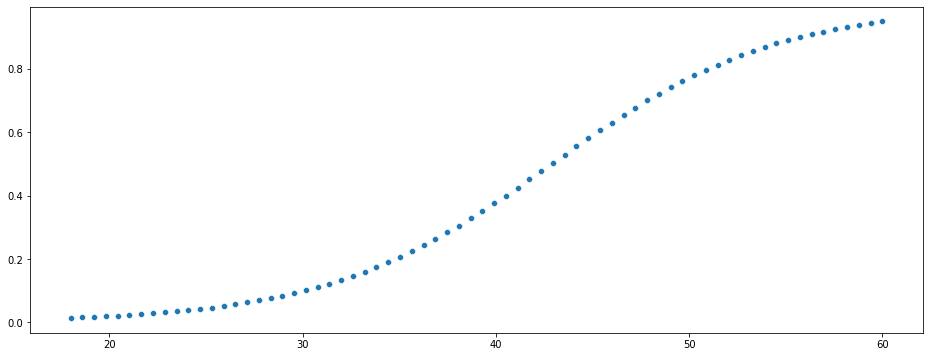

In [18]:
x_vals = np.linspace(X_test['Age'].min(), X_test['Age'].max(), 70)
y_vals = clf.predict_proba(x_vals.reshape(-1, 1))[:, 1]
# print(x_vals)
plt.figure(figsize=(16,6))
sns.scatterplot(x=x_vals, y=y_vals)

<Axes: xlabel='Age', ylabel='count'>

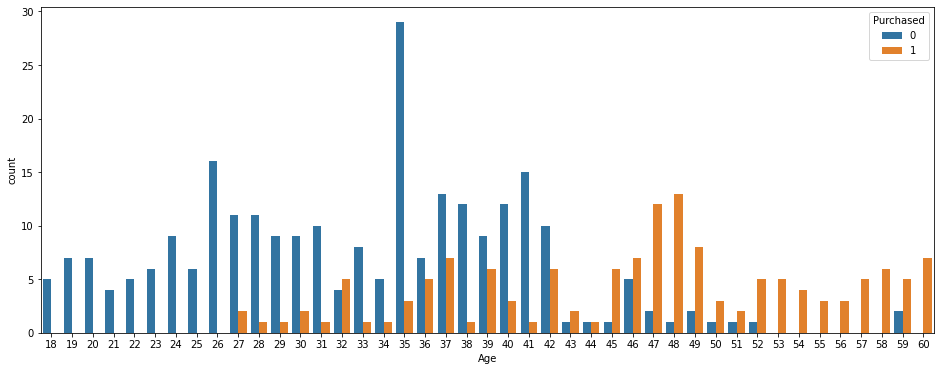

In [20]:
plt.figure(figsize=(16, 6))
sns.countplot(x="Age", hue="Purchased", data=df) 

## Analysis
1) The prediction graph of y_pred(probability) vs X_test showing the Sigmoid curve
2) The 'Age' is the distinguishable feature having more correlation with 'Purchased' feature.